# Data handling

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

## Groupby
- SQL groupby 명령어와 같음
- split -> apply -> combine 과정을 거쳐 연산함
- 한 개 이상의 column을 묶을 수 있음

In [ ]:
# data from: 
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}

df = pd.DataFrame(ipl_data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [ ]:
df.groupby("Team")["Points"].sum() # groupby(묶음의 기준이 되는 컬럼)[적용받는 컬럼].적용받는 연산()

Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

In [ ]:
df.groupby(["Team", "Year"])["Points"].sum()

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
kings   2015    812
Name: Points, dtype: int64

## Hierachical index
- Groupby 명령의 결과물도 결국은 DataFrame
- 두 개의 column 으로 groupby 할 경우, index는 두 개가 생성됨

In [ ]:
h_index = df.groupby(["Team", "Year"])["Points"].sum()
h_index.index

MultiIndex([('Devils', 2014),
            ('Devils', 2015),
            ( 'Kings', 2014),
            ( 'Kings', 2016),
            ( 'Kings', 2017),
            ('Riders', 2014),
            ('Riders', 2015),
            ('Riders', 2016),
            ('Riders', 2017),
            ('Royals', 2014),
            ('Royals', 2015),
            ( 'kings', 2015)],
           names=['Team', 'Year'])

Hierarchical index - unstack()
- Group 으로 묶인 데이터를 matrix 형태로 전환해줌

In [ ]:
h_index.unstack()

Year,2014,2015,2016,2017
Team,,,,
Devils,863.0,673.0,NaN,NaN
Kings,741.0,NaN,756.0,788.0
Riders,876.0,789.0,694.0,690.0
Royals,701.0,804.0,NaN,NaN
kings,NaN,812.0,NaN,NaN


Hierarchical index - swaplevel
- index level 을 변경

In [ ]:
h_index.swaplevel()

Year  Team  
2014  Devils    863
2015  Devils    673
2014  Kings     741
2016  Kings     756
2017  Kings     788
2014  Riders    876
2015  Riders    789
2016  Riders    694
2017  Riders    690
2014  Royals    701
2015  Royals    804
      kings     812
Name: Points, dtype: int64

In [ ]:
h_index.swaplevel().sortlevel(0)

AttributeError: ignored

Hierarchical index - operations
- index level을 기준으로 기본 연산 수행가능

In [ ]:
h_index.sum(level=0)

<ipython-input-20-8458f72a36a6>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  h_index.sum(level=0)


Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

In [ ]:
h_index.sum(level=1)

<ipython-input-21-20dc58708a0c>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  h_index.sum(level=1)


Year
2014    3181
2015    3078
2016    1450
2017    1478
Name: Points, dtype: int64

## Groupby(2)
Groupyby - grouped
- groupby에 의해 split 된 상태를 추출

In [ ]:
grouped = df.groupby("Team")

for name, group in grouped:
  print(name)
  print(group)

Devils
     Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673
Kings
    Team  Rank  Year  Points
4  Kings     3  2014     741
6  Kings     1  2016     756
7  Kings     1  2017     788
Riders
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690
Royals
      Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804
kings
    Team  Rank  Year  Points
5  kings     4  2015     812


- 특정 key 값을 가진 그룹의 정보만도 추출가능

In [ ]:
grouped.get_group("Devils")

,Team,Rank,Year,Points
2,Devils,2,2014,863
3,Devils,3,2015,673


- 추출된 group 정보에는 세 가지 유형의 apply가 가능
- Aggregation : 요약된 통계정보를 추출해 줌
- Transformation : 해당 정보를 변환해 줌
- Filtration : 특정 정보를 제거하여 보여주는 필터링 기능

Groupby - aggretation

In [ ]:
grouped.agg(sum)

,Rank,Year,Points
Team,,,
Devils,5,4029,1536
Kings,5,6047,2285
Riders,7,8062,3049
Royals,5,4029,1505
kings,4,2015,812


In [ ]:
grouped.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.500000,2014.500000,768.000000
Kings,1.666667,2015.666667,761.666667
Riders,1.750000,2015.500000,762.250000
Royals,2.500000,2014.500000,752.500000
kings,4.000000,2015.000000,812.000000


In [ ]:
grouped["Points"].agg([np.sum, np.mean, np.std])

,sum,mean,std
Team,,,
Devils,1536,768.000000,134.350288
Kings,2285,761.666667,24.006943
Riders,3049,762.250000,88.567771
Royals,1505,752.500000,72.831998
kings,812,812.000000,NaN


Groupby - transformation
- Aggregation과 달리 key 값 별로 요약된 정보가 아님
- 개별 데이터의 변환을 지원함

In [ ]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [ ]:
score = lambda x: (x)
grouped.transform(score) # Series 데이터에 적용되는 데이터들은 key값 기준으로 grouped 된 데이터 기준

,Rank,Year,Points
0,1,2014,876
1,2,2015,789
2,2,2014,863
3,3,2015,673
4,3,2014,741
5,4,2015,812
6,1,2016,756
7,1,2017,788
8,2,2016,694
9,4,2014,701


In [ ]:
score = lambda x: (x - x.mean()) / x.std() # Z값
grouped.transform(score) 

,Rank,Year,Points
0,-1.500000,-1.161895,1.284327
1,0.500000,-0.387298,0.302029
2,-0.707107,-0.707107,0.707107
3,0.707107,0.707107,-0.707107
4,1.154701,-1.091089,-0.860862
5,NaN,NaN,NaN
6,-0.577350,0.218218,-0.236043
7,-0.577350,0.872872,1.096905
8,0.500000,0.387298,-0.770596
9,0.707107,-0.707107,-0.707107


Groupby - filter
- 특정 조건으로 데이터를 검색할 때 사용

In [ ]:
df.groupby("Team").filter(lambda x: len(x) >=3) # filter 안에는 boolean 조건이 존재해야 함

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [ ]:
df.groupby("Team").filter(lambda x: x["Points"].max() > 800)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
5,kings,4,2015,812
8,Riders,2,2016,694
9,Royals,4,2014,701
10,Royals,1,2015,804
11,Riders,2,2017,690


In [ ]:
phone_url = 'https://www.shanelynn.ie/wp-content/uploads/2015/06/phone_data.csv'
df_phone = pd.read_csv(phone_url)
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [ ]:
import dateutil
df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse, dayfirst = True)
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [ ]:
df_phone.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [ ]:
df_phone[df_phone['item'] == 'call'].groupby('month')['duration'].sum()

month
2014-11    25547.0
2014-12    13561.0
2015-01    17070.0
2015-02    14416.0
2015-03    21727.0
Name: duration, dtype: float64

In [ ]:
df_phone.groupby(['month','item'])['duration'].sum()

month    item
2014-11  call    25547.000
         data      998.441
         sms        94.000
2014-12  call    13561.000
         data     1032.870
         sms        48.000
2015-01  call    17070.000
         data     1067.299
         sms        86.000
2015-02  call    14416.000
         data     1067.299
         sms        39.000
2015-03  call    21727.000
         data      998.441
         sms        25.000
Name: duration, dtype: float64

In [ ]:
df_phone.groupby(['month','item'])['duration'].count().unstack()

item,call,data,sms
month,,,
2014-11,107,29,94
2014-12,79,30,48
2015-01,88,31,86
2015-02,67,31,39
2015-03,47,29,25


In [ ]:
df_phone.groupby('month', as_index=False).agg({"duration": "sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [ ]:
df_phone.groupby(['month', 'item']).agg({'duration':sum, 
                                         'network_type':'count', 
                                         'date':'first'})

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [ ]:
df_phone.groupby(['month', 'item']).agg({'duration':[min], 
                                         'network_type':'count', 
                                         'date':[min, 'first', 'nunique']})

duration network_type                date                      \
                  min        count                 min               first   
month   item                                                                 
2014-11 call    1.000          107 2014-10-15 06:58:00 2014-10-15 06:58:00   
        data   34.429           29 2014-10-15 06:58:00 2014-10-15 06:58:00   
        sms     1.000           94 2014-10-16 22:18:00 2014-10-16 22:18:00   
2014-12 call    2.000           79 2014-11-14 17:24:00 2014-11-14 17:24:00   
        data   34.429           30 2014-11-13 06:58:00 2014-11-13 06:58:00   
        sms     1.000           48 2014-11-14 17:28:00 2014-11-14 17:28:00   
2015-01 call    2.000           88 2014-12-15 20:03:00 2014-12-15 20:03:00   
        data   34.429           31 2014-12-13 06:58:00 2014-12-13 06:58:00   
        sms     1.000           86 2014-12-15 19:56:00 2014-12-15 19:56:00   
2015-02 call    1.000           67 2015-01-15 10:36:00 2015-01-15 10:36:00   
        data   34.429           31 2015-01-13 06:58:00 2015-01-13 06:58:00   
        sms     1.000           39 2015-01-15 12:23:00 2015-01-15 12:23:00   
2015-03 call    2.000           47 2015-02-12 20:15:00 2015-02-12 20:15:00   
        data   34.429           29 2015-02-13 06:58:00 2015-02-13 06:58:00   
        sms     1.000           25 2015-02-19 18:46:00 2015-02-19 18:46:00   

                      
             nunique  
month   item          
2014-11 call     104  
        data      29  
        sms       79  
2014-12 call      76  
        data      30  
        sms       41  
2015-01 call      84  
        data      31  
        sms       58  
2015-02 call      67  
        data      31  
        sms       27  
2015-03 call      47  
        data      29  
        sms       17

In [ ]:
grouped = df_phone.groupby('month').agg({'duration': [min, max, np.mean]})
grouped

duration                     
             min      max        mean
month                                
2014-11      1.0   1940.0  115.823657
2014-12      1.0   2120.0   93.260318
2015-01      1.0   1859.0   88.894141
2015-02      1.0   1863.0  113.301453
2015-03      1.0  10528.0  225.251891

# pivot table Crosstab 
## Pivot Table

In [ ]:
df_phone = pd.read_csv(phone_url)
df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse, dayfirst = True)
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [ ]:
df_phone.pivot_table(['duration'], 
                     index=[df_phone.month, df_phone.item], 
                     columns = df_phone.network, aggfunc= 'sum', fill_value =0)

duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

## Crosstab
- 특히 두 column에 교차 빈도, 비율, 덧셈 등을 구할 대 사용
- Pivot table의 특수한 형태
- User-item Rating matrix 등을 만들 때 사용가능

In [ ]:
movie_url = '/content/drive/MyDrive/Boostcourse/AI Basic 2023/AI_4th_week/movie_rating.csv'
df_movie = pd.read_csv(movie_url)
df_movie.head()

,critic,title,rating
0,Jack Matthews,Lady in the Water,3.0
1,Jack Matthews,Snakes on a Plane,4.0
2,Jack Matthews,You Me and Dupree,3.5
3,Jack Matthews,Superman Returns,5.0
4,Jack Matthews,The Night Listener,3.0


In [ ]:
df_movie.pivot_table(['rating'], index = df_movie.critic, columns = df_movie.title, 
                     aggfunc = 'sum', fill_value = 0)

rating                                      \
title         Just My Luck Lady in the Water Snakes on a Plane   
critic                                                           
Claudia Puig           3.0               0.0               3.5   
Gene Seymour           1.5               3.0               3.5   
Jack Matthews          0.0               3.0               4.0   
Lisa Rose              3.0               2.5               3.5   
Mick LaSalle           2.0               3.0               4.0   
Toby                   0.0               0.0               4.5   

                                                                     
title         Superman Returns The Night Listener You Me and Dupree  
critic                                                               
Claudia Puig               4.0                4.5               2.5  
Gene Seymour               5.0                3.0               3.5  
Jack Matthews              5.0                3.0               3.5  
Lisa Rose                  3.5                3.0               2.5  
Mick LaSalle               3.0                3.0               2.0  
Toby                       4.0                0.0               1.0

In [ ]:
pd.crosstab(index = df_movie.critic, columns = df_movie.title, values = df_movie.rating, 
            aggfunc = 'first').fillna(0)

title,Just My Luck,Lady in the Water,Snakes on a Plane,Superman Returns,The Night Listener,You Me and Dupree
critic,,,,,,
Claudia Puig,3.0,0.0,3.5,4.0,4.5,2.5
Gene Seymour,1.5,3.0,3.5,5.0,3.0,3.5
Jack Matthews,0.0,3.0,4.0,5.0,3.0,3.5
Lisa Rose,3.0,2.5,3.5,3.5,3.0,2.5
Mick LaSalle,2.0,3.0,4.0,3.0,3.0,2.0
Toby,0.0,0.0,4.5,4.0,0.0,1.0


# Merge & Concat
## merge
- SQL 에서 많이 사용하는 merge와 같은 기능
- 두 개의 데이터를 하나로 합침

In [ ]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_score': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'test_score'])
df_a

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [ ]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [ ]:
pd.merge(df_a, df_b, on = 'subject_id') # subject_id 기준으로 merge

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


In [ ]:
# 두 DataFrame 이 column 이름이 다를 때
pd.merge(df_a, df_b, left_on = 'subject_id', right_on = 'subject_id')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


## Join method
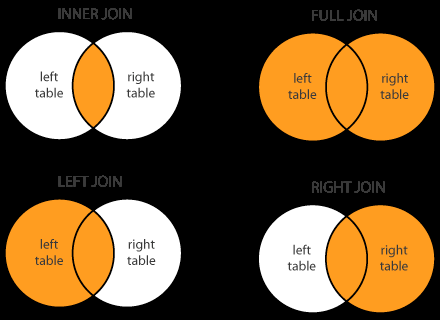

In [ ]:
# left join
pd.merge(df_a, df_b, on='subject_id', how='left')

,subject_id,test_score,first_name,last_name
0,1,51,NaN,NaN
1,2,15,NaN,NaN
2,3,15,NaN,NaN
3,4,61,Billy,Bonder
4,5,16,Brian,Black
5,7,14,Bryce,Brice
6,8,15,Betty,Btisan
7,9,1,NaN,NaN
8,10,61,NaN,NaN
9,11,16,NaN,NaN


In [ ]:
# right join
pd.merge(df_a, df_b, on='subject_id', how='right')

,subject_id,test_score,first_name,last_name
0,4,61.0,Billy,Bonder
1,5,16.0,Brian,Black
2,6,NaN,Bran,Balwner
3,7,14.0,Bryce,Brice
4,8,15.0,Betty,Btisan


In [ ]:
# Full(outer) join
pd.merge(df_a, df_b, on = 'subject_id', how = 'outer')

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,Billy,Bonder
4,5,16.0,Brian,Black
5,7,14.0,Bryce,Brice
6,8,15.0,Betty,Btisan
7,9,1.0,NaN,NaN
8,10,61.0,NaN,NaN
9,11,16.0,NaN,NaN


In [ ]:
pd.merge(df_a, df_b, on = 'subject_id', how = 'inner')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


Index based join

In [ ]:
pd.merge(df_a, df_b, right_index = True, left_index = True)

,subject_id_x,test_score,subject_id_y,first_name,last_name
0,1,51,4,Billy,Bonder
1,2,15,5,Brian,Black
2,3,15,6,Bran,Balwner
3,4,61,7,Bryce,Brice
4,5,16,8,Betty,Btisan


## Concat
- 같은 형태의 데이터를 붙이는 연산작업

In [ ]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [ ]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [ ]:
df_new = pd.concat([df_a, df_b])
df_new.reset_index()

,index,subject_id,first_name,last_name
0,0,1,Alex,Anderson
1,1,2,Amy,Ackerman
2,2,3,Allen,Ali
3,3,4,Alice,Aoni
4,4,5,Ayoung,Atiches
5,0,4,Billy,Bonder
6,1,5,Brian,Black
7,2,6,Bran,Balwner
8,3,7,Bryce,Brice
9,4,8,Betty,Btisan


In [ ]:
df_a.append(df_b)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [ ]:
df_new = pd.concat([df_a, df_b], axis =1)
df_new.reset_index()

,index,subject_id,test_score,subject_id,first_name,last_name
0,0,1,51,4,Billy,Bonder
1,1,2,15,5,Brian,Black
2,2,3,15,6,Bran,Balwner
3,3,4,61,7,Bryce,Brice
4,4,5,16,8,Betty,Btisan
5,5,7,14,NaN,NaN,NaN
6,6,8,15,NaN,NaN,NaN
7,7,9,1,NaN,NaN,NaN
8,8,10,61,NaN,NaN,NaN
9,9,11,16,NaN,NaN,NaN


# DB Persistence
## Database connection
- Data loading 시 db connection 기능을 제공함

In [ ]:
import sqlite3



## XLS persistence
- DataFrame 의 excel 추출코드
- Xls 엔진으로 openpyxls 또는 XlsxWrite 사용

## Pickle persistence
- 가장 일반적인 python 파일 persistence
- to_pickle, read_pickle 함수 사용